<a href="https://colab.research.google.com/github/rociocelestial/Challenge2-Data-Science/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [46]:
import requests
import pandas as pd

In [47]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
# Convertir el contenido en un diccionario de Python
data = response.json()
# Lo transformo con pandas, este diccionario en un DataFrame, pero esto no sirve
# por esto hacemos
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [48]:
# por esto hacemos pd.json_normalize(data)
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

**Verificación**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2.- Verificación de Valores Unicos

In [50]:
for col in df.columns:
  print(f"Valores unicos en la columna'{col}:{df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' *50)


Valores unicos en la columna'customerID:7267'
Valores unicos en la columna'Churn:3'
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna'customer.gender:2'
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna'customer.SeniorCitizen:2'
[0 1]
--------------------------------------------------
Valores unicos en la columna'customer.Partner:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.Dependents:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.tenure:73'
Valores unicos en la columna'phone.PhoneService:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'phone.MultipleLines:3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos en la columna'internet.InternetService:3'
['DSL' 'Fiber optic' 'No']
--------

3.- Valores Duplicados

In [51]:
print('Números de duplicados', df.duplicated().sum())

Números de duplicados 0


4.- Valores Nulos

In [52]:
print('Núumeros nulos', df.isnull().sum())

Núumeros nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


5.- Valores Vacios o en Blanco

In [53]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**Transformación**

1.- Cambiando la columna 'account.Charges.Total' para float

In [54]:
# from numpy import float64
# no es posible porque numpy solo convierte números no string (object)
# df['account.Charges.Total'].dtype(float64)
# vamos a cambiar valores vacios a valores nulos
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)


float64


2.- Eliminación de valores vacios en la columna 'Churn'

In [55]:
df = df[df['Churn'].str.strip() != '']
print('Número de filas despues de eliminar los vacios en "Churn":', len(df))

Número de filas despues de eliminar los vacios en "Churn": 7043


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [57]:
df = df.dropna(subset= ['account.Charges.Total'])


In [58]:
print('Núumeros nulos', df.isnull().sum())

Núumeros nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


3.- Creando un nueva columna, llamada 'Cuentas diarias'

In [61]:
df['cuentas_diarias'] = df['cargo_mensual']/30
df

,cliente_id,Churn,genero,jubilado_mas-de_65años,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


4.- Cambiando el nombre a las columnas

In [60]:
columnas = {                                                        # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'cliente_id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'jubilado_mas-de_65años',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total'
}

df =  df.rename(columns = columnas)
df

,cliente_id,Churn,genero,jubilado_mas-de_65años,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [62]:
columnas_a_traducir = ['Churn', 'genero', 'posee_pareja','posee_dependientes','servicio_telefono','multiples_lineas',
                       'seguridad_online','backup_online','proteccion_dispositivo','soporte_tecnico','streaming_tv','streaming_peliculas','factura_digital']

mapeo = {'Yes':'Si', 'No':'No','Female':'Femenino','Male':'Masculino', 'No phone service': 'Sin servicio de telefono',
         'No internet service':'Sin servicio de internet'}

for col in columnas_a_traducir:
  df[col] = df[col].replace(mapeo)



In [63]:
df

,cliente_id,Churn,genero,jubilado_mas-de_65años,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Month-to-month,Si,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Month-to-month,Si,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Si,No,DSL,...,No,Si,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,0,Si,No,22,Si,Si,Fiber optic,...,No,No,No,Si,Month-to-month,Si,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Si,No,DSL,...,No,No,No,No,Month-to-month,Si,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Two year,No,Mailed check,67.85,4627.65,2.261667


In [64]:
df['jubilado_mas-de_65años'] = df['jubilado_mas-de_65años'].replace({1:'Si', 0:'No'})
df.head()

,cliente_id,Churn,genero,jubilado_mas-de_65años,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.40,2.796667


In [65]:
df['metodo_pago'] = df['metodo_pago'].replace({'Mailed check':'Cheque enviado por correo', 'Electronic check':'Cheque electrónico',
                                               'Credit card (automatic)':'Tarjeta de crédito (automático)',
                                               'Bank transfer (automatic)':'Transferencia bancaria (automática)'})
df.head()

,cliente_id,Churn,genero,jubilado_mas-de_65años,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Month-to-month,Si,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Month-to-month,Si,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Month-to-month,Si,Cheque enviado por correo,83.9,267.40,2.796667


#📊 Carga y análisis

In [66]:
df.describe()

,tiempo_contrato,cargo_mensual,cargo_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


In [67]:
import matplotlib.pyplot as plt

In [68]:
df['Churn'].unique()

array(['No', 'Si'], dtype=object)

In [69]:
conteo_si_churn = df['Churn'].value_counts().get('Si', 0)
print(f"Número de 'Si' en la columna 'Churn': {conteo_si_churn}")

Número de 'Si' en la columna 'Churn': 1869


In [70]:
conteo_no_churn = df['Churn'].value_counts().get('No', 0)
print(f"Número de 'No' en la columna 'Churn': {conteo_no_churn}")

Número de 'No' en la columna 'Churn': 5163


In [72]:
churn_counts = df['Churn'].value_counts()
churn_counts

,count
Churn,
No,5163
Si,1869


In [73]:
churn_porcentaje = df['Churn'].value_counts(normalize=True)*100
churn_porcentaje

,proportion
Churn,
No,73.421502
Si,26.578498


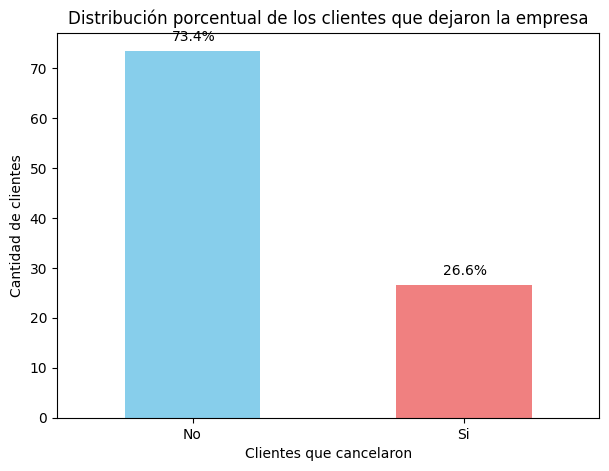

In [85]:
# Crear el gráfico de barras
plt.figure(figsize=(7,5))
ax = churn_porcentaje.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución porcentual de los clientes que dejaron la empresa')
plt.xlabel('Clientes que cancelaron')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)


# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1, 10), textcoords='offset points', fontsize=10)

plt.show()



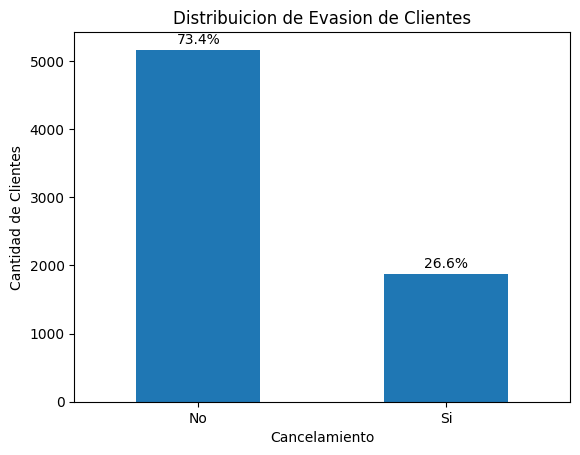

In [80]:
ax = churn_counts.plot(kind='bar')
plt.title('Distribuicion de Evasion de Clientes')
plt.xlabel('Cancelamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_porcentaje):
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')


plt.show()

#📄Informe final